In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
w1 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week1.csv")
w12 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_w1w2.csv")
w123 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_w1w2w3.csv")
w1234 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_w1w2w3w4.csv")

In [4]:
w1

,Unnamed: 0,enrollment_id,username,course_id,no_of_objects1,bno_access1,bno_pageclose1,bno_problem1,bno_video1,bno_discussion1,...,browser_problem1,browser_video1,server_access1,server_discussion1,server_problem1,server_navigate1,server_wiki1,bno_browser1,bno_server1,label
0,0,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,13,9,2,14,1,0,...,14,1,5,0,0,5,0,21,10,0
1,1,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,34,53,20,45,13,5,...,37,13,25,5,8,11,0,98,49,0
2,2,7,I1KwJ6EdCZnEPLfC8Q7yWpIkLOHn7h02,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,30,59,20,34,22,0,...,31,22,26,0,3,10,0,106,39,1
3,3,45,5Tz6BGN7p1lkmdoopAY1Z5ufYTrUsi9E,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,3,2,1,0,0,0,...,0,0,2,0,0,1,0,1,3,0
4,4,49,2oTvbzieHn2y5oozeOgSnruqE6N0BtR5,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,28,102,52,16,15,504,...,8,15,85,504,8,62,0,92,659,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,8704,199056,OGCl7FuINJMmIPxVehaSeriK0obhKOqa,SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw,8,6,4,0,3,0,...,0,3,6,0,0,1,0,7,7,1
8705,8705,199057,AW3qB37tEUxBhbQEUxhofJkaUbKF4F7i,bWdj2GDclj5ofokWjzoa5jAwMkxCykd6,2,0,0,0,0,4,...,0,0,0,4,0,1,0,0,5,1
8706,8706,199058,VeLCqoeC0RO3eUOAMmBgbUdlxxqFnwbN,SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw,4,4,0,0,0,0,...,0,0,4,0,0,2,0,0,6,0
8707,8707,199069,M45QNJ6951iGJajsprAeFVhHViiX50AV,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,22,12,10,0,9,5,...,0,9,12,5,0,5,1,19,23,1


In [5]:
w1.drop('Unnamed: 0', axis=1, inplace=True)
w12.drop('Unnamed: 0', axis=1, inplace=True)
w123.drop('Unnamed: 0', axis=1, inplace=True)
w1234.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
w1_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week1_test.csv")
w12_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_w1w2_test.csv")
w123_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_w1w2w3_test.csv")
w1234_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_w1w2w3w4_test.csv")

In [7]:
w1_test

,Unnamed: 0,enrollment_id,username,course_id,no_of_objects1,bno_access1,bno_pageclose1,bno_problem1,bno_video1,bno_discussion1,...,browser_problem1,browser_video1,server_access1,server_discussion1,server_problem1,server_navigate1,server_wiki1,bno_browser1,bno_server1,label
0,0,34,OeLBIzS0gNQ56euxy5b66gAZMzQCGE7n,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,10,12,5,4,3,0,...,3,3,11,0,1,7,1,12,20,0
1,1,66,cGrHiRjztN9fSltHujpfWaaWfYWiidiG,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,32,125,30,62,11,68,...,46,11,67,68,16,17,0,145,168,0
2,2,89,Po17baTutQqG3KBkMaahpxQ7IpjhFfZa,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,16,35,2,17,13,0,...,14,13,15,0,3,5,0,49,23,1
3,3,145,TZOWoG0yzTTzAfx5K054mpl5rZTlZIcZ,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,31,69,23,56,10,25,...,52,10,47,25,4,5,2,107,83,1
4,4,163,jJZ8z8M2beLy33Z7JJbNFq1bQd8o43FV,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,4,2,0,0,0,0,...,0,0,2,0,0,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,5774,199048,seGsWY5pHJdYc0dygxkfgWkiK3wzJxVH,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,5,3,1,0,1,0,...,0,1,2,0,0,2,0,3,4,1
5775,5775,199063,ODCx2UO2z0ldelF48alKkiQzrvYMM8sJ,G8EPVSXsOYB5YQWZGiz1aVq5Pgr2GrQu,9,6,3,2,1,0,...,2,1,3,0,0,9,0,9,12,1
5776,5776,199068,TTLR6K3ZlbSrGOfX2kjd2U4ChldGiopU,RXDvfPUBYFlVdlueBFbLW0mhhAyGEqpt,5,3,1,0,0,0,...,0,0,3,0,0,3,0,1,6,1
5777,5777,199070,mne1Bu1F2f0U7iravmS4eQYQtLTkVvPe,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,9,4,3,0,3,0,...,0,3,4,0,0,3,0,6,7,1


In [8]:
w1_test.drop('Unnamed: 0', axis=1, inplace=True)
w12_test.drop('Unnamed: 0', axis=1, inplace=True)
w123_test.drop('Unnamed: 0', axis=1, inplace=True)
w1234_test.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
w1 = pd.concat([w1, w1_test], axis=0)
w12 = pd.concat([w12, w12_test], axis=0)
w123 = pd.concat([w123, w123_test], axis=0)
w1234 = pd.concat([w1234, w1234_test], axis=0)

In [10]:
w1

,enrollment_id,username,course_id,no_of_objects1,bno_access1,bno_pageclose1,bno_problem1,bno_video1,bno_discussion1,bno_navigate1,...,browser_problem1,browser_video1,server_access1,server_discussion1,server_problem1,server_navigate1,server_wiki1,bno_browser1,bno_server1,label
0,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,13,9,2,14,1,0,5,...,14,1,5,0,0,5,0,21,10,0
1,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,34,53,20,45,13,5,11,...,37,13,25,5,8,11,0,98,49,0
2,7,I1KwJ6EdCZnEPLfC8Q7yWpIkLOHn7h02,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,30,59,20,34,22,0,10,...,31,22,26,0,3,10,0,106,39,1
3,45,5Tz6BGN7p1lkmdoopAY1Z5ufYTrUsi9E,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,3,2,1,0,0,0,1,...,0,0,2,0,0,1,0,1,3,0
4,49,2oTvbzieHn2y5oozeOgSnruqE6N0BtR5,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,28,102,52,16,15,504,62,...,8,15,85,504,8,62,0,92,659,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,199048,seGsWY5pHJdYc0dygxkfgWkiK3wzJxVH,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,5,3,1,0,1,0,2,...,0,1,2,0,0,2,0,3,4,1
5775,199063,ODCx2UO2z0ldelF48alKkiQzrvYMM8sJ,G8EPVSXsOYB5YQWZGiz1aVq5Pgr2GrQu,9,6,3,2,1,0,9,...,2,1,3,0,0,9,0,9,12,1
5776,199068,TTLR6K3ZlbSrGOfX2kjd2U4ChldGiopU,RXDvfPUBYFlVdlueBFbLW0mhhAyGEqpt,5,3,1,0,0,0,3,...,0,0,3,0,0,3,0,1,6,1
5777,199070,mne1Bu1F2f0U7iravmS4eQYQtLTkVvPe,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,9,4,3,0,3,0,3,...,0,3,4,0,0,3,0,6,7,1


### Week 1 - preprocessing

In [11]:
w1['username']=pd.factorize(w1['username'])[0]         #converting to numerical data
w1['course_id']=pd.factorize(w1['course_id'])[0]

In [12]:
x1=w1.drop('label',axis=1)
y1=w1['label']

In [13]:
scaler = MinMaxScaler()
cols_to_norm = x1.iloc[:, 3:].columns
x1[cols_to_norm] = scaler.fit_transform(x1[cols_to_norm])

In [14]:
smote = SMOTE()
# fit predictor and target variable
x1_smote, y1_smote = smote.fit_resample(x1, y1)
print('Original dataset shape', Counter(y1))
print('Resample dataset shape', Counter(y1_smote))

Original dataset shape Counter({1: 11345, 0: 3143})
Resample dataset shape Counter({0: 11345, 1: 11345})


In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1_smote, y1_smote, test_size=0.3, random_state=7)   # Train test split

In [16]:
y_train1

20715    0
4254     1
6403     1
13518    1
14378    1
        ..
919      0
20691    0
5699     1
10742    1
16921    0
Name: label, Length: 15883, dtype: int64

### Week 1 + Week 2 - Preprocessing

In [17]:
w12['username']=pd.factorize(w12['username'])[0]         #converting to numerical data
w12['course_id']=pd.factorize(w12['course_id'])[0]

In [18]:
x12=w12.drop('label',axis=1)
y12=w12['label']

In [19]:
scaler = MinMaxScaler()
cols_to_norm = x12.iloc[:, 3:].columns
x12[cols_to_norm] = scaler.fit_transform(x12[cols_to_norm])

In [20]:
smote = SMOTE()
# fit predictor and target variable
x12_smote, y12_smote = smote.fit_resample(x12, y12)
print('Original dataset shape', Counter(y12))
print('Resample dataset shape', Counter(y12_smote))

Original dataset shape Counter({1: 14829, 0: 3730})
Resample dataset shape Counter({0: 14829, 1: 14829})


In [21]:
x_train12, x_test12, y_train12, y_test12 = train_test_split(x12_smote, y12_smote, test_size=0.3, random_state=7)   # Train test split

### Week 1 + Week 2 + Week 3 processing

In [22]:
w123['username']=pd.factorize(w123['username'])[0]         #converting to numerical data
w123['course_id']=pd.factorize(w123['course_id'])[0]

In [23]:
x123=w123.drop('label',axis=1)
y123=w123['label']

In [24]:
scaler = MinMaxScaler()
cols_to_norm = x123.iloc[:, 3:].columns
x123[cols_to_norm] = scaler.fit_transform(x123[cols_to_norm])

In [25]:
smote = SMOTE()
# fit predictor and target variable
x123_smote, y123_smote = smote.fit_resample(x123, y123)
print('Original dataset shape', Counter(y123))
print('Resample dataset shape', Counter(y123_smote))

Original dataset shape Counter({1: 18267, 0: 4283})
Resample dataset shape Counter({0: 18267, 1: 18267})


In [26]:
x_train123, x_test123, y_train123, y_test123 = train_test_split(x123_smote, y123_smote, test_size=0.3, random_state=7)   # Train test split

### Week 1 + Week 2 + Week 3 + Week 4 preprocessing

In [27]:
w1234['username']=pd.factorize(w1234['username'])[0]         #converting to numerical data
w1234['course_id']=pd.factorize(w1234['course_id'])[0]

In [28]:
x1234=w1234.drop('label',axis=1)
y1234=w1234['label']

In [29]:
scaler = MinMaxScaler()
cols_to_norm = x1234.iloc[:, 3:].columns
x1234[cols_to_norm] = scaler.fit_transform(x1234[cols_to_norm])

In [30]:
smote = SMOTE()
# fit predictor and target variable
x1234_smote, y1234_smote = smote.fit_resample(x1234, y1234)
print('Original dataset shape', Counter(y1234))
print('Resample dataset shape', Counter(y1234_smote))

Original dataset shape Counter({1: 29603, 0: 6541})
Resample dataset shape Counter({0: 29603, 1: 29603})


In [31]:
x_train1234, x_test1234, y_train1234, y_test1234 = train_test_split(x1234_smote, y1234_smote, test_size=0.3, random_state=7)   # Train test split

### Week 1 - training

#### Decision Trees

In [32]:
dt=DecisionTreeClassifier()
dt.fit(x_train1, y_train1)
predictions_dt_1 = dt.predict(x_test1)
print(classification_report(y_test1,predictions_dt_1))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3423
           1       0.84      0.81      0.82      3384

    accuracy                           0.83      6807
   macro avg       0.83      0.83      0.83      6807
weighted avg       0.83      0.83      0.83      6807



#### SVM

In [33]:
svc=SVC()
svc.fit(x_train1, y_train1)
predictions_svc_1 = svc.predict(x_test1)
print(classification_report(y_test1,predictions_svc_1))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      3423
           1       0.66      0.74      0.70      3384

    accuracy                           0.68      6807
   macro avg       0.69      0.69      0.68      6807
weighted avg       0.69      0.68      0.68      6807



#### XGBoost

In [34]:
xgb = XGBClassifier()
xgb.fit(x_train1, y_train1)
predictions_xgb_1 = xgb.predict(x_test1)
print(classification_report(y_test1,predictions_xgb_1))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3423
           1       0.86      0.90      0.88      3384

    accuracy                           0.87      6807
   macro avg       0.87      0.87      0.87      6807
weighted avg       0.87      0.87      0.87      6807



#### Random Forest Classifier

In [35]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train1, y_train1)
predictions_rf_1 = rf.predict(x_test1)
print(classification_report(y_test1,predictions_rf_1))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3423
           1       0.80      0.76      0.78      3384

    accuracy                           0.79      6807
   macro avg       0.79      0.79      0.79      6807
weighted avg       0.79      0.79      0.79      6807



### Week 1 + Week 2 - training

#### Decision Trees

In [36]:
dt=DecisionTreeClassifier()
dt.fit(x_train12, y_train12)
predictions_dt_12 = dt.predict(x_test12)
print(classification_report(y_test12,predictions_dt_12))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4505
           1       0.84      0.84      0.84      4393

    accuracy                           0.84      8898
   macro avg       0.84      0.84      0.84      8898
weighted avg       0.84      0.84      0.84      8898



#### SVC

In [37]:
svc=SVC()
svc.fit(x_train12, y_train12)
predictions_svc_12 = svc.predict(x_test12)
print(classification_report(y_test12,predictions_svc_12))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4505
           1       0.65      0.72      0.69      4393

    accuracy                           0.67      8898
   macro avg       0.67      0.67      0.67      8898
weighted avg       0.68      0.67      0.67      8898



#### XGBoost

In [38]:
xgb = XGBClassifier()
xgb.fit(x_train12, y_train12)
predictions_xgb_12 = xgb.predict(x_test12)
print(classification_report(y_test12,predictions_xgb_12))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4505
           1       0.85      0.91      0.88      4393

    accuracy                           0.88      8898
   macro avg       0.88      0.88      0.88      8898
weighted avg       0.88      0.88      0.88      8898



#### Random Forest

In [39]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train12, y_train12)
predictions_rf_12 = rf.predict(x_test12)
print(classification_report(y_test12,predictions_rf_12))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      4505
           1       0.79      0.82      0.81      4393

    accuracy                           0.80      8898
   macro avg       0.80      0.80      0.80      8898
weighted avg       0.80      0.80      0.80      8898



### Week 1 + Week 2 + Week 3 - training

#### Decision Tree

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train123, y_train123)
predictions_dt_123 = dt.predict(x_test123)
print(classification_report(y_test123,predictions_dt_123))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5492
           1       0.86      0.85      0.85      5469

    accuracy                           0.86     10961
   macro avg       0.86      0.86      0.86     10961
weighted avg       0.86      0.86      0.86     10961



#### SVM

In [41]:
svc=SVC()
svc.fit(x_train123, y_train123)
predictions_svc_123 = svc.predict(x_test123)
print(classification_report(y_test123,predictions_svc_123))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63      5492
           1       0.64      0.73      0.68      5469

    accuracy                           0.66     10961
   macro avg       0.66      0.66      0.66     10961
weighted avg       0.66      0.66      0.66     10961



#### XGBoost

In [42]:
xgb = XGBClassifier()
xgb.fit(x_train123, y_train123)
predictions_xgb_123 = xgb.predict(x_test123)
print(classification_report(y_test123,predictions_xgb_123))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5492
           1       0.86      0.92      0.89      5469

    accuracy                           0.88     10961
   macro avg       0.88      0.88      0.88     10961
weighted avg       0.88      0.88      0.88     10961



#### Random Forest 

In [43]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train123, y_train123)
predictions_rf_123 = rf.predict(x_test123)
print(classification_report(y_test123,predictions_rf_123))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      5492
           1       0.81      0.78      0.80      5469

    accuracy                           0.80     10961
   macro avg       0.80      0.80      0.80     10961
weighted avg       0.80      0.80      0.80     10961



### Week 1 + Week 2 + Week 3 + Week 4 - training

#### Decision Tree

In [44]:
dt=DecisionTreeClassifier()
dt.fit(x_train1234, y_train1234)
predictions_dt_1234 = dt.predict(x_test1234)
print(classification_report(y_test1234,predictions_dt_1234))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      8810
           1       0.88      0.87      0.88      8952

    accuracy                           0.88     17762
   macro avg       0.88      0.88      0.88     17762
weighted avg       0.88      0.88      0.88     17762



#### SVC

In [45]:
svc=SVC()
svc.fit(x_train1234, y_train1234)
predictions_svc_1234 = svc.predict(x_test1234)
print(classification_report(y_test1234,predictions_svc_1234))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      8810
           1       0.64      0.72      0.68      8952

    accuracy                           0.65     17762
   macro avg       0.66      0.65      0.65     17762
weighted avg       0.66      0.65      0.65     17762



#### XGBoost

In [46]:
xgb = XGBClassifier()
xgb.fit(x_train1234, y_train1234)
predictions_xgb_1234 = xgb.predict(x_test1234)
print(classification_report(y_test1234,predictions_xgb_1234))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      8810
           1       0.87      0.93      0.90      8952

    accuracy                           0.90     17762
   macro avg       0.90      0.90      0.90     17762
weighted avg       0.90      0.90      0.90     17762



#### Random Forest

In [47]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train1234, y_train1234)
predictions_rf_1234 = rf.predict(x_test1234)
print(classification_report(y_test1234,predictions_rf_1234))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      8810
           1       0.81      0.86      0.84      8952

    accuracy                           0.83     17762
   macro avg       0.83      0.83      0.83     17762
weighted avg       0.83      0.83      0.83     17762



## Stacking ensembles

In [48]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('dt', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier(max_depth=2, random_state=0)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
sc1 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

### Week1

#### Ensemble - DT, SVM, XGB, Random Forest

In [49]:
sc1.fit(x_train1,y_train1)
predictions_st1_4 = sc1.predict(x_test1)
print(classification_report(y_test1,predictions_st1_4))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3423
           1       0.86      0.90      0.88      3384

    accuracy                           0.88      6807
   macro avg       0.88      0.88      0.88      6807
weighted avg       0.88      0.88      0.88      6807



In [50]:
print(accuracy_score(y_test1, predictions_st1_4), roc_auc_score(y_test1, predictions_st1_4))

0.8776259732628177 0.8777440054035799


### Week1 + Week 2

#### Ensemble 1 - DT, SVM, XGB, Random Forest

In [51]:
sc1.fit(x_train12,y_train12)
predictions_st12_4 = sc1.predict(x_test12)
print(classification_report(y_test12,predictions_st12_4))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4505
           1       0.86      0.92      0.89      4393

    accuracy                           0.89      8898
   macro avg       0.89      0.89      0.89      8898
weighted avg       0.89      0.89      0.89      8898



In [52]:
print(accuracy_score(y_test12, predictions_st12_4), roc_auc_score(y_test12, predictions_st12_4))

0.8852551135086536 0.885659963017544


### Week 1 + Week 2 + Week 3

#### Ensemble - DT, SVM, XGB, Random Forest

In [53]:
sc1.fit(x_train123,y_train123)
predictions_st123_4 = sc1.predict(x_test123)
print(classification_report(y_test123,predictions_st123_4))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5492
           1       0.87      0.91      0.89      5469

    accuracy                           0.89     10961
   macro avg       0.89      0.89      0.89     10961
weighted avg       0.89      0.89      0.89     10961



In [54]:
print(accuracy_score(y_test123, predictions_st123_4), roc_auc_score(y_test123, predictions_st123_4))

0.8881488915244959 0.8881970244256944


### Week 1 + Week 2 + Week 3 + Week 4

#### Ensemble - DT, SVM, XGB, Random Forest

In [55]:
sc1.fit(x_train1234,y_train1234)
predictions_st1234_4 = sc1.predict(x_test1234)
print(classification_report(y_test1234,predictions_st1234_4))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      8810
           1       0.89      0.93      0.91      8952

    accuracy                           0.91     17762
   macro avg       0.91      0.91      0.91     17762
weighted avg       0.91      0.91      0.91     17762



In [56]:
print(accuracy_score(y_test1234, predictions_st1234_4), roc_auc_score(y_test1234, predictions_st1234_4))

0.9060916563450062 0.9059101055040427


### Graphs

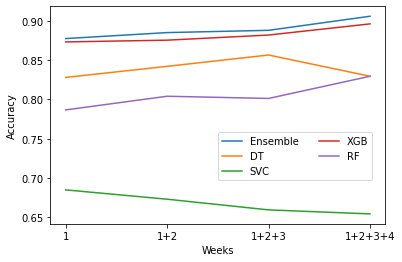

In [72]:
# Accuracy graph - 4 models
x = ['1','1+2','1+2+3','1+2+3+4']
y_ens = [accuracy_score(y_test1, predictions_st1_4), accuracy_score(y_test12, predictions_st12_4), accuracy_score(y_test123, predictions_st123_4), accuracy_score(y_test1234, predictions_st1234_4)]
y_dt = [accuracy_score(y_test1, predictions_dt_1), accuracy_score(y_test12, predictions_dt_12), accuracy_score(y_test123, predictions_dt_123), accuracy_score(y_test1234, predictions_rf_1234)]
y_svc = [accuracy_score(y_test1, predictions_svc_1), accuracy_score(y_test12, predictions_svc_12), accuracy_score(y_test123, predictions_svc_123), accuracy_score(y_test1234, predictions_svc_1234)]
y_xgb = [accuracy_score(y_test1, predictions_xgb_1), accuracy_score(y_test12, predictions_xgb_12), accuracy_score(y_test123, predictions_xgb_123), accuracy_score(y_test1234, predictions_xgb_1234)]
y_rf = [accuracy_score(y_test1, predictions_rf_1), accuracy_score(y_test12, predictions_rf_12), accuracy_score(y_test123, predictions_rf_123), accuracy_score(y_test1234, predictions_rf_1234)]
plt.plot(x, y_ens, label = "Ensemble")
plt.plot(x, y_dt, label = "DT")
plt.plot(x, y_svc, label = "SVC")
plt.plot(x, y_xgb, label = "XGB")
plt.plot(x, y_rf, label = "RF")
plt.xlabel("Weeks")
plt.ylabel("Accuracy")
plt.legend(ncol=2, loc=(0.5,0.2))
plt.savefig('/content/drive/MyDrive/Mitacs project/dataset/Datafull/weeks_vs_accuracy_method1.png')
#plt.show()

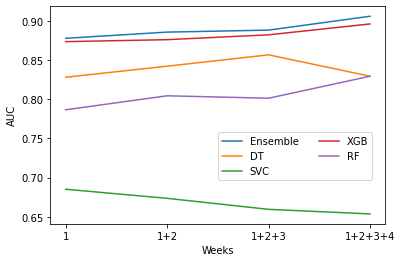

In [73]:
# AUC graph - 4 models
x = ['1','1+2','1+2+3','1+2+3+4']
y_ens = [roc_auc_score(y_test1, predictions_st1_4), roc_auc_score(y_test12, predictions_st12_4), roc_auc_score(y_test123, predictions_st123_4), roc_auc_score(y_test1234, predictions_st1234_4)]
y_dt = [roc_auc_score(y_test1, predictions_dt_1), roc_auc_score(y_test12, predictions_dt_12), roc_auc_score(y_test123, predictions_dt_123), roc_auc_score(y_test1234, predictions_rf_1234)]
y_svc = [roc_auc_score(y_test1, predictions_svc_1), roc_auc_score(y_test12, predictions_svc_12), roc_auc_score(y_test123, predictions_svc_123), roc_auc_score(y_test1234, predictions_svc_1234)]
y_xgb = [roc_auc_score(y_test1, predictions_xgb_1), roc_auc_score(y_test12, predictions_xgb_12), roc_auc_score(y_test123, predictions_xgb_123), roc_auc_score(y_test1234, predictions_xgb_1234)]
y_rf = [roc_auc_score(y_test1, predictions_rf_1), roc_auc_score(y_test12, predictions_rf_12), roc_auc_score(y_test123, predictions_rf_123), roc_auc_score(y_test1234, predictions_rf_1234)]
plt.plot(x, y_ens, label = "Ensemble")
plt.plot(x, y_dt, label = "DT")
plt.plot(x, y_svc, label = "SVC")
plt.plot(x, y_xgb, label = "XGB")
plt.plot(x, y_rf, label = "RF")  
plt.xlabel("Weeks")
plt.ylabel("AUC")
plt.legend(ncol=2, loc=(0.5,0.2))
plt.savefig('/content/drive/MyDrive/Mitacs project/dataset/Datafull/weeks_vs_AUC_method1.png')
plt.show()